In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [7]:
import os
base_dir = 'Garbage'
test_dir = 'test'

In [8]:
# Menghitung jumlah gambar pada dataset
number_label = {}
total_files = 0
for i in os.listdir(base_dir):
    counting = len(os.listdir(os.path.join(base_dir, i)))
    number_label[i] = counting
    total_files += counting

print("Total Files : " + str(total_files))

Total Files : 2527


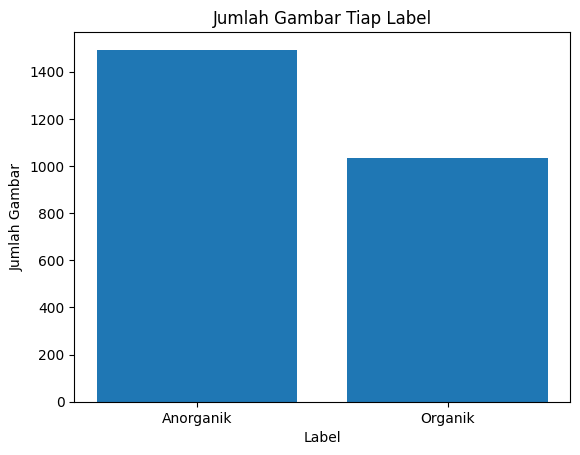

In [9]:
# Visualisasi jumlah gambar tiap kelas
import matplotlib.pyplot as plt

plt.bar(number_label.keys(), number_label.values());
plt.title("Jumlah Gambar Tiap Label");
plt.xlabel('Label');
plt.ylabel('Jumlah Gambar');

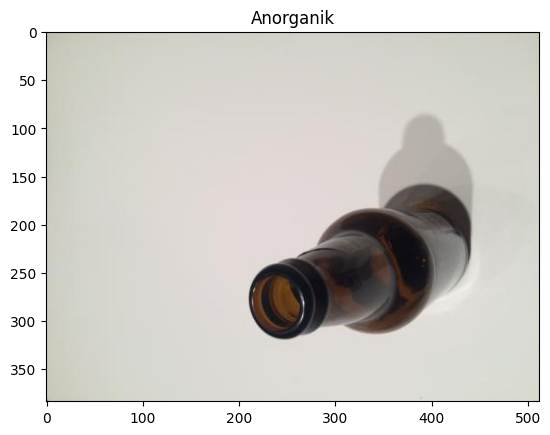

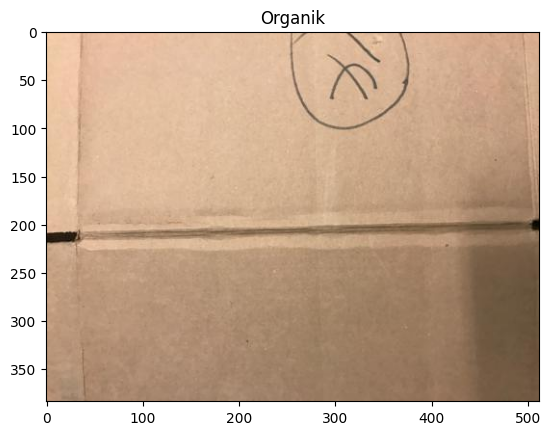

In [10]:
# Menampilkan sampel gambar tiap kelas
import matplotlib.image as mpimg

img_each_class = 1
img_samples = {}
classes = list(number_label.keys())


for c in classes:
    temp = os.listdir(os.path.join(base_dir, c))[:img_each_class]
    for item in temp:
        img_path = os.path.join(base_dir, c, item)
        img_samples[c] = img_path

for i in img_samples:
    fig = plt.gcf()
    img = mpimg.imread(img_samples[i])
    plt.title(i)
    plt.imshow(img)
    plt.show()

In [11]:
# Membuat arsitektur model CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
# Mengompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Membuat objek ImageDataGenerator untuk augmentation dan preprocessing data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
# Memuat dataset training dan testing menggunakan ImageDataGenerator
training_set = train_datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 2527 images belonging to 2 classes.


Found 2527 images belonging to 2 classes.


In [15]:
# Melatih model menggunakan dataset training
history = model.fit(
    training_set,
    epochs=20,
    validation_data=test_set
)

Epoch 1/20
79/79 [==============================] - 115s 1s/step - loss: 0.6246 - accuracy: 0.6529 - val_loss: 0.6027 - val_accuracy: 0.6803
Epoch 2/20
79/79 [==============================] - 27s 336ms/step - loss: 0.5496 - accuracy: 0.7107 - val_loss: 0.4939 - val_accuracy: 0.7380
Epoch 3/20
79/79 [==============================] - 22s 279ms/step - loss: 0.4975 - accuracy: 0.7416 - val_loss: 0.4776 - val_accuracy: 0.7566
Epoch 4/20
79/79 [==============================] - 22s 282ms/step - loss: 0.4665 - accuracy: 0.7602 - val_loss: 0.5099 - val_accuracy: 0.7436
Epoch 5/20
79/79 [==============================] - 22s 278ms/step - loss: 0.4964 - accuracy: 0.7495 - val_loss: 0.4262 - val_accuracy: 0.7887
Epoch 6/20
79/79 [==============================] - 22s 278ms/step - loss: 0.4535 - accuracy: 0.7788 - val_loss: 0.4016 - val_accuracy: 0.8120
Epoch 7/20
79/79 [==============================] - 23s 289ms/step - loss: 0.4300 - accuracy: 0.7962 - val_loss: 0.4004 - val_accuracy: 0.8057
E

In [17]:
# Evaluasi akurasi model pada dataset testing
accuracy = model.evaluate(test_set)[1]
print("Akurasi: {:.2f}%".format(accuracy * 100))


79/79 [==============================] - 35s 443ms/step - loss: 0.2419 - accuracy: 0.8995
Akurasi: 89.95%


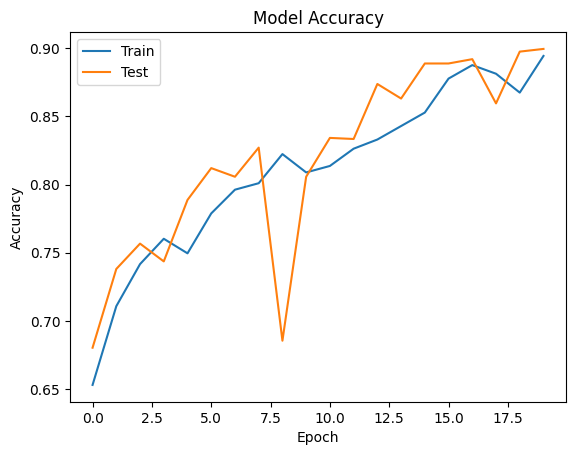

In [18]:
# Plot grafik epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

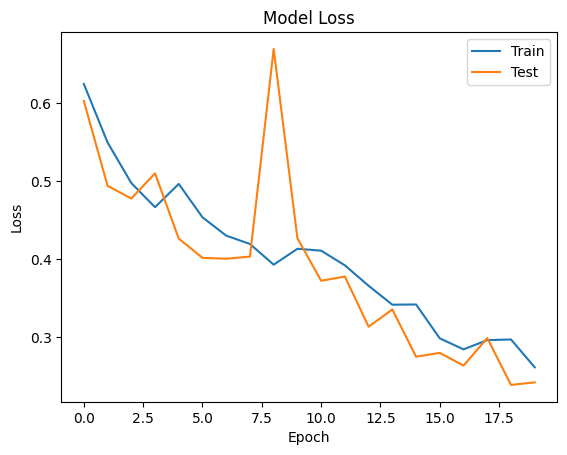

In [19]:
# Plot grafik akurasi
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [20]:
# Menyimpan model dalam format HDF5
model.save('CNNmodel.h5')
print("Model telah disimpan.")

Model telah disimpan.


In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [22]:
# Memuat model yang telah dilatih sebelumnya
model = load_model('CNNmodel.h5')

In [23]:
def classify_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalisasi piksel gambar

    result = model.predict(img)
    if result[0][0] < 0.5:
        return "Anorganik"
    else:
        return "Organik"

In [24]:
# Uji coba dengan mengunggah foto
file_path = input("Masukkan path foto: ")
result = classify_image(file_path)
print("Hasil klasifikasi: ", result)

1/1 [==============================] - 4s 4s/step
Hasil klasifikasi:  Anorganik
